<a href="https://colab.research.google.com/github/RobertTunn1983/BigDataAnalytics/blob/main/Final_Version_Coursework%2C_Robert_Tunn%2C_2015065.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Big Data Analysis Coursework
#Robert Tunn, 2015065

<br>
The aim of this coursework is to examine a dataset and thereafter propose a machine learning model which could be used to predict the likelihood of a debtor defaulting on their credit card payments. Default is defined as two consecutive months of non-payment. The dataset used to formulate the model is taken from the online UCI database on the default of Credit Card clients available at:
<br>
<br>
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
<br>
<br>
The dataset has been formatted as a .csv file and uploaded to a public github repository. The Google Colab code runs immediately without uploading a file to the Google Colab drive. Just click on the play icons although please note that some of the code relating to the decision tree takes a long time to run.
<br>
<br>
The dataset contains information on the payments, demographic factors, credit data and bill statements of 30,000 credit card debtors of a Taiwanese financial institution from April 2005 to September 2005.
<br>
<br>
The 25 variables in the dataset are detailed below. Any monetary amounts are denominated in NT (New Taiwan) dollars.
<br>
<br>

1. **ID**: index value serving as an anonymous ID for the debtor;

<br>

2. **LIMIT_BAL**: total amount of given credit for that individual including family/supplementary credit;

<br>

3. **SEX**: binary assignation of gender (1: male, 2: female);

<br>

4. **EDUCATION**: (

>>1: Graduate School;

>>2: University;

>>3: High School;

>>4: Others;

>>5: Unknown;

>>6: Unknown

>);

>Please see markdown notes in project on categories 4-6 of education data.

<br>

5. **MARRIAGE**: Marital status (
  
>>1: Married;

>>2: Single;

>>3: Others

>);

<br>

6. **PAY_0**: Repayment status as of September 2005 (

>>-1: Paid in accordance with agreement;

>>1: Payment delay for one month;

>>2: Payment delay for two months;

>>...and so on...

>>8: Payment delay for eight months;

>>9: Payment delay for nine months and above;

>);

<br>

7. **PAY_2**: Repayment status in August 2005, scale same as PAY_0;

<br>

8. **PAY_3**: Repayment status in July 2005, scale same as PAY_0;

<br>

9. **PAY_4**: Repayment status in June 2005, scale same as PAY_0;

<br>

10. **PAY_5**: Repayment status in May 2005, scale same as PAY_0;

<br>

11. **PAY_6**: Repayment status in April 2005, scale same as PAY_0;

<br>

12. **BILL_AMT1**: Amount of bill statement in September, 2005;

<br>

13. **BILL_AMT2**: Amount of bill statement in August, 2005;

<br>

14. **BILL_AMT3**: Amount of bill statement in July, 2005;

<br>

15. **BILL_AMT4**: Amount of bill statement in June, 2005;

<br>

16. **BILL_AMT5**: Amount of bill statement in May, 2005;

<br>

17. **BILL_AMT6**: Amount of bill statement in April, 2005;

<br>

18. **PAY_AMT1**: Amount of previous payment in September, 2005;

<br>

19. **PAY_AMT2**: Amount of previous payment in August, 2005;

<br>

20. **PAY_AMT3**: Amount of previous payment in July, 2005;

<br>

21. **PAY_AMT4**: Amount of previous payment in June, 2005;

<br>

22. **PAY_AMT5**: Amount of previous payment in May, 2005;

<br>

23. **PAY_AMT6**: Amount of previous payment in April, 2005;

<br>

24. **default.payment.next.month**: Binary information on whether debtor defaulted or not (1:yes, 2:no)

#Types of variables

Categoric variables: 
Sex; 
Education (0, 5 and 6 put into 4), 
and Marriage (marriage = 0 put into 3)

Continuous variables:
BILL_AMT(0-6); 
PAY_AMT(0-6); 
AGE and 
LIMIT_BAL

Discrete variables:
PAY_(0-6) 
Note: it was discovered that there are in fact an additional -2 and 0 value which are retained after discussion

The dependent variable default.payment.next.month is relabelled as "Default" and denotes whether the debtor had defaulted on their agreement or not

#Importing libraries and uploading data

In [ ]:
#Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
%matplotlib inline
import graphviz

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import f1_score

In [ ]:
#The original dataset from the UCI website is stored in a deprecated .xls format
#The dataset has been saved in .csv format and uploaded to a public repository on my github.com page
#Considerable issues arose when MS Excel was used for this purpose amongst which was the conversion of all datafields to strings
df_raw = "https://raw.githubusercontent.com/RobertTunn1983/BigDataAnalytics/main/default_of_credit_card_payments.csv"

#Read .csv file and save as a dataframe
df = pd.read_csv(df_raw)

#Take a first glance at the dataset

In [ ]:
#Show top 5 rows
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
#Display types of data in dataset per column
df.dtypes

#Datatypes are being reported in their true form

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [ ]:
#Iterate over entire dataset to make sure that there are no missing values
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
#Provide statistics on the dataset in tabular form
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


#Tidy up dataset

In [ ]:
#Column naming is awkward, especially "PAY_0" and "default.payment.next.month"
#These are re-named as PAY_1 and "Default"

df.rename(columns={"PAY_0": "PAY_1"}, inplace=True)

df.rename(columns={"default.payment.next.month": "Default"}, inplace=True)

#Also the ID column is only an index so drop
df.drop('ID', axis = 1, inplace =True)

#Sex and status columns return some meaningless statistics but they are very important
#categories

#I also decided to relabel the PAY_AMT, BILL_AMT and PAY columns because I found the
#numbering irritating and doing so helps explain things better in the next 
#section
#PAY actually concerns the debtor's status or rating as a debtor

#Make explicitly clear that PAID columns refer to amounts paid in a particular month
#They are refer to payments made against total debt accrued in previous month so
#PAID_FOR used as a label
df.rename(columns = {"PAY_AMT6": "PAID_FOR_Mar"}, inplace=True)
df.rename(columns = {"PAY_AMT5": "PAID_FOR_Apr"}, inplace=True)
df.rename(columns = {"PAY_AMT4": "PAID_FOR_May"}, inplace=True)
df.rename(columns = {"PAY_AMT3": "PAID_FOR_Jun"}, inplace=True)
df.rename(columns = {"PAY_AMT2": "PAID_FOR_Jul"}, inplace=True)
df.rename(columns = {"PAY_AMT1": "PAID_FOR_Aug"}, inplace=True)

#Make explicitly clear that BILL columns refer to statement balances in a particular month
df.rename(columns = {"BILL_AMT6": "BILL_Apr"}, inplace=True)
df.rename(columns = {"BILL_AMT5": "BILL_May"}, inplace=True)
df.rename(columns = {"BILL_AMT4": "BILL_Jun"}, inplace=True)
df.rename(columns = {"BILL_AMT3": "BILL_Jul"}, inplace=True)
df.rename(columns = {"BILL_AMT2": "BILL_Aug"}, inplace=True)
df.rename(columns = {"BILL_AMT1": "BILL_Sep"}, inplace=True)

#Make explicitly clear that PAY columns refer to repayment status in a particular month
df.rename(columns = {"PAY_6": "status_Apr"}, inplace=True)
df.rename(columns = {"PAY_5": "status_May"}, inplace=True)
df.rename(columns = {"PAY_4": "status_Jun"}, inplace=True)
df.rename(columns = {"PAY_3": "status_Jul"}, inplace=True)
df.rename(columns = {"PAY_2": "status_Aug"}, inplace=True)
df.rename(columns = {"PAY_1": "status_Sep"}, inplace=True)


#Show updated dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
status_Sep,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
status_Aug,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
status_Jul,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
status_Jun,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
status_May,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


#Do not overlook: how does the data actually fit together?

We need to explore the relationship between the amounts owed (BILL), the amounts paid (PAID_FOR) and then work in the status of the debtor so that these figures make sense and are displayed in an easily understood format.

In [ ]:
df[['PAID_FOR_Mar', 'BILL_Apr', 'PAID_FOR_Apr', 'BILL_May', 'PAID_FOR_May', 'BILL_Jun', 'PAID_FOR_Jun', 'BILL_Jul', 'PAID_FOR_Jul', 'BILL_Aug', 'PAID_FOR_Aug', 'BILL_Sep']].head(15)

,PAID_FOR_Mar,BILL_Apr,PAID_FOR_Apr,BILL_May,PAID_FOR_May,BILL_Jun,PAID_FOR_Jun,BILL_Jul,PAID_FOR_Jul,BILL_Aug,PAID_FOR_Aug,BILL_Sep
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,689.0,689.0,3102.0,0.0,3913.0
1,2000.0,3261.0,0.0,3455.0,1000.0,3272.0,1000.0,2682.0,1000.0,1725.0,0.0,2682.0
2,5000.0,15549.0,1000.0,14948.0,1000.0,14331.0,1000.0,13559.0,1500.0,14027.0,1518.0,29239.0
3,1000.0,29547.0,1069.0,28959.0,1100.0,28314.0,1200.0,49291.0,2019.0,48233.0,2000.0,46990.0
4,679.0,19131.0,689.0,19146.0,9000.0,20940.0,10000.0,35835.0,36681.0,5670.0,2000.0,8617.0
5,800.0,20024.0,1000.0,19619.0,1000.0,19394.0,657.0,57608.0,1815.0,57069.0,2500.0,64400.0
6,13770.0,473944.0,13750.0,483003.0,20239.0,542653.0,38000.0,445007.0,40000.0,412023.0,55000.0,367965.0
7,1542.0,567.0,1687.0,-159.0,581.0,221.0,0.0,601.0,601.0,380.0,380.0,11876.0
8,1000.0,3719.0,1000.0,11793.0,1000.0,12211.0,432.0,12108.0,0.0,14096.0,3329.0,11285.0
9,0.0,13912.0,1122.0,13007.0,13007.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Observations**:

PAID_Apr is not useful because it must refer to payments made against statements received by the debtors for spending in March and we do not have the total debts accrued to that point. Amounts due under credit cards are billed the following month creating some potential for confusion here. I have seen several models online that failed to understand this and are flawed at the outset. The data cannot just be thrown into a decision tree and fingers crossed.

Row 14: the debtor makes a steady payment of 3000 NT every month yet the amount owed to the bank increases month on month. This increase must be attributed to further spending on the card and/as well as interest accrued, the amounts of which are not important to this model but we need to acknowledge that they are there for this to make sense.

For now I will leave in BILL_Sep because it may be relevant to the next stage when I attempt to incorporate status.




**Remove PAID_APR column and figure out how debtor status works.**

In [ ]:
df[['LIMIT_BAL', 'BILL_Apr', 'PAID_FOR_Apr', 'status_Apr', 'BILL_May', 'PAID_FOR_May', 'status_May', 'BILL_Jun', 'PAID_FOR_Jun', 'status_Jun', 'BILL_Jul', 'PAID_FOR_Jul', 'status_Jul', 'BILL_Aug', 'PAID_FOR_Aug', 'status_Aug', 'BILL_Sep', 'status_Sep']].head(15)

,LIMIT_BAL,BILL_Apr,PAID_FOR_Apr,status_Apr,BILL_May,PAID_FOR_May,status_May,BILL_Jun,PAID_FOR_Jun,status_Jun,BILL_Jul,PAID_FOR_Jul,status_Jul,BILL_Aug,PAID_FOR_Aug,status_Aug,BILL_Sep,status_Sep
0,20000.0,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-1,689.0,689.0,-1,3102.0,0.0,2,3913.0,2
1,120000.0,3261.0,0.0,2,3455.0,1000.0,0,3272.0,1000.0,0,2682.0,1000.0,0,1725.0,0.0,2,2682.0,-1
2,90000.0,15549.0,1000.0,0,14948.0,1000.0,0,14331.0,1000.0,0,13559.0,1500.0,0,14027.0,1518.0,0,29239.0,0
3,50000.0,29547.0,1069.0,0,28959.0,1100.0,0,28314.0,1200.0,0,49291.0,2019.0,0,48233.0,2000.0,0,46990.0,0
4,50000.0,19131.0,689.0,0,19146.0,9000.0,0,20940.0,10000.0,0,35835.0,36681.0,-1,5670.0,2000.0,0,8617.0,-1
5,50000.0,20024.0,1000.0,0,19619.0,1000.0,0,19394.0,657.0,0,57608.0,1815.0,0,57069.0,2500.0,0,64400.0,0
6,500000.0,473944.0,13750.0,0,483003.0,20239.0,0,542653.0,38000.0,0,445007.0,40000.0,0,412023.0,55000.0,0,367965.0,0
7,100000.0,567.0,1687.0,-1,-159.0,581.0,0,221.0,0.0,0,601.0,601.0,-1,380.0,380.0,-1,11876.0,0
8,140000.0,3719.0,1000.0,0,11793.0,1000.0,0,12211.0,432.0,0,12108.0,0.0,2,14096.0,3329.0,0,11285.0,0
9,20000.0,13912.0,1122.0,-1,13007.0,13007.0,-1,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,-2


BILL_Sep and status_Sep are also irrelevant because we do not know if the debtors managed to pay off any of their debt for that month or not. Both are now removed.

In [ ]:
df[['LIMIT_BAL', 'BILL_Apr', 'PAID_FOR_Apr', 'status_Apr', 'BILL_May', 'PAID_FOR_May', 'status_May', 'BILL_Jun', 'PAID_FOR_Jun', 'status_Jun', 'BILL_Jul', 'PAID_FOR_Jul', 'status_Jul', 'BILL_Aug', 'PAID_FOR_Aug', 'status_Aug']].head(15)

,LIMIT_BAL,BILL_Apr,PAID_FOR_Apr,status_Apr,BILL_May,PAID_FOR_May,status_May,BILL_Jun,PAID_FOR_Jun,status_Jun,BILL_Jul,PAID_FOR_Jul,status_Jul,BILL_Aug,PAID_FOR_Aug,status_Aug
0,20000.0,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-1,689.0,689.0,-1,3102.0,0.0,2
1,120000.0,3261.0,0.0,2,3455.0,1000.0,0,3272.0,1000.0,0,2682.0,1000.0,0,1725.0,0.0,2
2,90000.0,15549.0,1000.0,0,14948.0,1000.0,0,14331.0,1000.0,0,13559.0,1500.0,0,14027.0,1518.0,0
3,50000.0,29547.0,1069.0,0,28959.0,1100.0,0,28314.0,1200.0,0,49291.0,2019.0,0,48233.0,2000.0,0
4,50000.0,19131.0,689.0,0,19146.0,9000.0,0,20940.0,10000.0,0,35835.0,36681.0,-1,5670.0,2000.0,0
5,50000.0,20024.0,1000.0,0,19619.0,1000.0,0,19394.0,657.0,0,57608.0,1815.0,0,57069.0,2500.0,0
6,500000.0,473944.0,13750.0,0,483003.0,20239.0,0,542653.0,38000.0,0,445007.0,40000.0,0,412023.0,55000.0,0
7,100000.0,567.0,1687.0,-1,-159.0,581.0,0,221.0,0.0,0,601.0,601.0,-1,380.0,380.0,-1
8,140000.0,3719.0,1000.0,0,11793.0,1000.0,0,12211.0,432.0,0,12108.0,0.0,2,14096.0,3329.0,0
9,20000.0,13912.0,1122.0,-1,13007.0,13007.0,-1,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2


**-2 and 0 as statuses?**

-2 and 0 are not recognised as statuses according to the scale that came with the data. -1 is said to signify that the debtor is keeping to their agreement and 1 and above are said to denote the amount of payment delay in months.

Lets see if we can find more out about -2 by highlighting all -2s in the first 50 entries:

In [ ]:
df_showMins2s = df[['LIMIT_BAL', 'BILL_Apr', 'PAID_FOR_Apr', 'status_Apr', 'BILL_May', 'PAID_FOR_May', 'status_May', 'BILL_Jun', 'PAID_FOR_Jun', 'status_Jun', 'BILL_Jul', 'PAID_FOR_Jul', 'status_Jul', 'BILL_Aug', 'PAID_FOR_Aug', 'status_Aug']].head(50)

def colour_red(x, props=''):
    return props if x == -2 else None

df_showMins2s.style.applymap(colour_red, props='color:red;')

,LIMIT_BAL,BILL_Apr,PAID_FOR_Apr,status_Apr,BILL_May,PAID_FOR_May,status_May,BILL_Jun,PAID_FOR_Jun,status_Jun,BILL_Jul,PAID_FOR_Jul,status_Jul,BILL_Aug,PAID_FOR_Aug,status_Aug
0,20000.000000,0.000000,0.000000,-2,0.000000,0.000000,-2,0.000000,0.000000,-1,689.000000,689.000000,-1,3102.000000,0.000000,2
1,120000.000000,3261.000000,0.000000,2,3455.000000,1000.000000,0,3272.000000,1000.000000,0,2682.000000,1000.000000,0,1725.000000,0.000000,2
2,90000.000000,15549.000000,1000.000000,0,14948.000000,1000.000000,0,14331.000000,1000.000000,0,13559.000000,1500.000000,0,14027.000000,1518.000000,0
3,50000.000000,29547.000000,1069.000000,0,28959.000000,1100.000000,0,28314.000000,1200.000000,0,49291.000000,2019.000000,0,48233.000000,2000.000000,0
4,50000.000000,19131.000000,689.000000,0,19146.000000,9000.000000,0,20940.000000,10000.000000,0,35835.000000,36681.000000,-1,5670.000000,2000.000000,0
5,50000.000000,20024.000000,1000.000000,0,19619.000000,1000.000000,0,19394.000000,657.000000,0,57608.000000,1815.000000,0,57069.000000,2500.000000,0
6,500000.000000,473944.000000,13750.000000,0,483003.000000,20239.000000,0,542653.000000,38000.000000,0,445007.000000,40000.000000,0,412023.000000,55000.000000,0
7,100000.000000,567.000000,1687.000000,-1,-159.000000,581.000000,0,221.000000,0.000000,0,601.000000,601.000000,-1,380.000000,380.000000,-1
8,140000.000000,3719.000000,1000.000000,0,11793.000000,1000.000000,0,12211.000000,432.000000,0,12108.000000,0.000000,2,14096.000000,3329.000000,0
9,20000.000000,13912.000000,1122.000000,-1,13007.000000,13007.000000,-1,0.000000,0.000000,-2,0.000000,0.000000,-2,0.000000,0.000000,-2


As in row 23 above, -2 appears to occur when the debtor has either not used their credit or they have been very sensible and paid off their balance (or slightly more than their balance) every month.

Row 33 shows stats on a debtor who initially did not pay off their entire balance but thereafter did so and they retain a status of -2 throughout. It could be that they paid off their entire balance several times over that month, we simply do not have the data to say.

Given that people with -2 leave no debt at the end of the month they must be some form of low risk debtor from the bank's point of view and I will leave this data as it is. It is tempting to put all -2s into the same category of keeping to the agreement but clearly the bank sees some merit in having a -2 status.

It would follow that -1 is a debtor who does leaves debt owing at the end of the month albeit within the agreed boundaries.

Now the 0 values are highlighted:

In [ ]:
df_showZeros = df[['LIMIT_BAL', 'BILL_Apr', 'PAID_FOR_Apr', 'status_Apr', 'BILL_May', 'PAID_FOR_May', 'status_May', 'BILL_Jun', 'PAID_FOR_Jun', 'status_Jun', 'BILL_Jul', 'PAID_FOR_Jul', 'status_Jul', 'BILL_Aug', 'PAID_FOR_Aug', 'status_Aug']].head(50)

def colour_red(x, props=''):
    return props if x == 0 else None

df_showZeros.style.applymap(colour_red, props='color:red;')


,LIMIT_BAL,BILL_Apr,PAID_FOR_Apr,status_Apr,BILL_May,PAID_FOR_May,status_May,BILL_Jun,PAID_FOR_Jun,status_Jun,BILL_Jul,PAID_FOR_Jul,status_Jul,BILL_Aug,PAID_FOR_Aug,status_Aug
0,20000.000000,0.000000,0.000000,-2,0.000000,0.000000,-2,0.000000,0.000000,-1,689.000000,689.000000,-1,3102.000000,0.000000,2
1,120000.000000,3261.000000,0.000000,2,3455.000000,1000.000000,0,3272.000000,1000.000000,0,2682.000000,1000.000000,0,1725.000000,0.000000,2
2,90000.000000,15549.000000,1000.000000,0,14948.000000,1000.000000,0,14331.000000,1000.000000,0,13559.000000,1500.000000,0,14027.000000,1518.000000,0
3,50000.000000,29547.000000,1069.000000,0,28959.000000,1100.000000,0,28314.000000,1200.000000,0,49291.000000,2019.000000,0,48233.000000,2000.000000,0
4,50000.000000,19131.000000,689.000000,0,19146.000000,9000.000000,0,20940.000000,10000.000000,0,35835.000000,36681.000000,-1,5670.000000,2000.000000,0
5,50000.000000,20024.000000,1000.000000,0,19619.000000,1000.000000,0,19394.000000,657.000000,0,57608.000000,1815.000000,0,57069.000000,2500.000000,0
6,500000.000000,473944.000000,13750.000000,0,483003.000000,20239.000000,0,542653.000000,38000.000000,0,445007.000000,40000.000000,0,412023.000000,55000.000000,0
7,100000.000000,567.000000,1687.000000,-1,-159.000000,581.000000,0,221.000000,0.000000,0,601.000000,601.000000,-1,380.000000,380.000000,-1
8,140000.000000,3719.000000,1000.000000,0,11793.000000,1000.000000,0,12211.000000,432.000000,0,12108.000000,0.000000,2,14096.000000,3329.000000,0
9,20000.000000,13912.000000,1122.000000,-1,13007.000000,13007.000000,-1,0.000000,0.000000,-2,0.000000,0.000000,-2,0.000000,0.000000,-2


Row 49 is interesting. The amount owed by this debtor is slightly above their agreed spending limit in April and May however they are making payments and managing to bring their debt down. Interestingly they retain a 0 status after appearing to remain below their spending limit for three months thereafter. It could be that people close to their limit also receive a 0 status, maybe people who go over their limit are assigned a 0 or maybe something else. We do not know the fine details of how the bank assigns a status and it is inappropriate to speculate.

Having explored -2, -1 and 0 as debtor statuses the remainder (1 and above for every month in default) appears self explanatory. These discrete values can be weighted so that as the value increases so does the bank's concern that this debtor will not be able to make repayments. 

I conclude that the statuses of -2 and 0 are in keeping with the other discrete values for status and clealry serve some purpose and should be retained for the purpose of the decision tree.



#First observations: What is the prima facia risk of default? Is the data balanced?

**What is the risk of a debtor defaulting? Simple number of debtors/ number of defaults**

In [ ]:
#This is simply the mean value in the Default column (0.221200) or can be manually calculated as:

(df.Default.sum() / len(df.Default))*100

22.12

i.e. there is a 22.12% probability that a debtor will default irrespective of any further consideration e.g. sex, age, education etc

**Is the dataset balanced?**

In [ ]:
#Is the dataset balanced?
#I.e does the dataframe include an equal number of defaulting and non-defaulting
#debtors?

df['Default'].value_counts()

0    23364
1     6636
Name: Default, dtype: int64

Obviously the number of defaulting and non-defaulting debtors are not in equal 
proportion. This means that the dataset is imbalanced. 


#Distribution of values within categorical variables - sex, marital status, education

**Sex**

In [ ]:
#Take a look at distibution of sex
#Note (male:1, female:2)
df['SEX'].value_counts()

#There are significantly more females than males in the dataset

#The common perception is that men are more likely to be delinquent debtors than
#women, this could be cross-referenced with education level etc to check

2    18112
1    11888
Name: SEX, dtype: int64

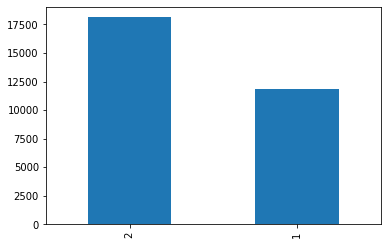

In [ ]:
#Plot chart
df['SEX'].value_counts().plot(kind = 'bar')

**Marital Status**

In [ ]:
#Distribution according to marital status
df['MARRIAGE'].value_counts(ascending=True)

0       54
3      323
1    13659
2    15964
Name: MARRIAGE, dtype: int64

We have an obvious problem here i.e. what sort of marital arrangements are represented by categories 0 and 3 containing 54 and 323 debtors respectively? Are they man and wife living apart? Are they cohabitees? Are they something else? We could delete them but I prefer to place them together and label them as others.

In [ ]:
#Put 0 into 3
df['MARRIAGE'] = np.where(df['MARRIAGE'] == 0, 3, df['MARRIAGE'])

In [ ]:
#And check that this has worked
#Distribution according to marital status
df['MARRIAGE'].value_counts(ascending=True)

3      377
1    13659
2    15964
Name: MARRIAGE, dtype: int64

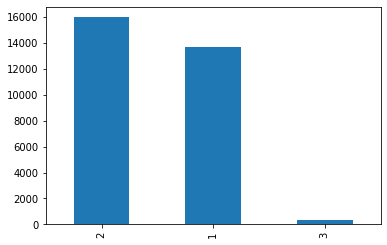

In [ ]:
#Show graph of updated values
df['MARRIAGE'].value_counts().plot(kind = 'bar')

**Highest Level of Education**

In [ ]:
#Distribution according to highest level of educational attainment
df['EDUCATION'].value_counts(ascending=True)

0       14
6       51
4      123
5      280
3     4917
1    10585
2    14030
Name: EDUCATION, dtype: int64

We have a similar problem here to marital status: categories 5, 4, 6 and 0 are labelled either "Others" or "Unknown". Categories 1, 2 and 3 represent standard levels of educational achievement e.g. University graduate and "Others" implies that something has been achieved but is not on the list whereas "Unknown" means that there is no knowledge of this. Owing to the small numbers involved I have decided to put categories 5, 4, 6 and 0 into 5 as "Others".

In [ ]:
#Put 0, 5 and 6 into 4
df['EDUCATION'] = np.where(df['EDUCATION'] == 0, 4, df['EDUCATION'])
df['EDUCATION'] = np.where(df['EDUCATION'] == 5, 4, df['EDUCATION'])
df['EDUCATION'] = np.where(df['EDUCATION'] == 6, 4, df['EDUCATION'])


In [ ]:
#Show updated counts to check that code has worked
df['EDUCATION'].value_counts(ascending=True)

4      468
3     4917
1    10585
2    14030
Name: EDUCATION, dtype: int64

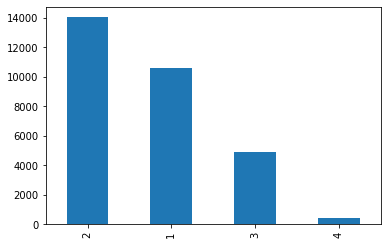

In [ ]:
#Show chart, just for the sake of completeness
df['EDUCATION'].value_counts().plot(kind = 'bar')

#Distribution of values within numerical variables - bill statement, amount paid towards bill and debtor status

Histograms are created in order to give a feel for the distribution of the numerical variables and to look for any obvious outliers.

As with categorical variables above, some recategorisation is carried out.

**Amount of bill statement**

In [ ]:
#Create function for displaying histograms
def display_hist(df, variables, n_rows, n_cols, n_bins):
    fig = plt.figure()
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins = n_bins, ax = ax)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()

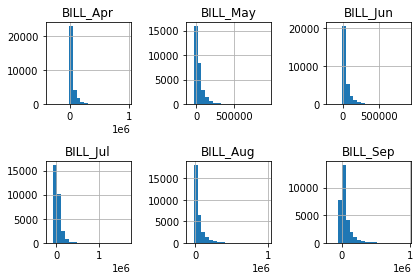

In [ ]:
#Display histogram for BILL variables
bill_amounts = df[['BILL_Apr', 'BILL_May', 'BILL_Jun', 'BILL_Jul', 'BILL_Aug', 'BILL_Sep',]]
display_hist(bill_amounts, bill_amounts.columns, 2, 3, 20)

**Amount of previous statement**

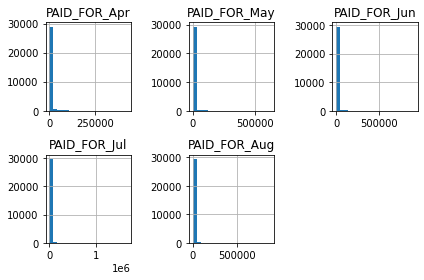

In [ ]:
#Display histogram for PAID_FOR variables
prevStatement_amounts = df[['PAID_FOR_Apr','PAID_FOR_May', 'PAID_FOR_Jun', 'PAID_FOR_Jul', 'PAID_FOR_Aug']]
display_hist(prevStatement_amounts, prevStatement_amounts.columns, 2, 3, 20)

**Repayment status**

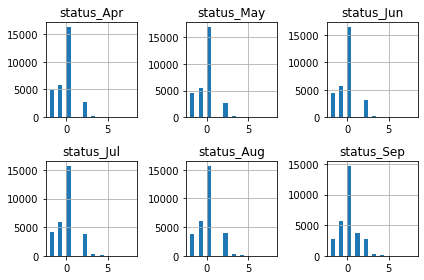

In [ ]:
#Display histogram for status variables
repStatus = df[['status_Apr','status_May', 'status_Jun', 'status_Jul', 'status_Aug', 'status_Sep']]
display_hist(repStatus, repStatus.columns, 2, 3, 20)

**Age**

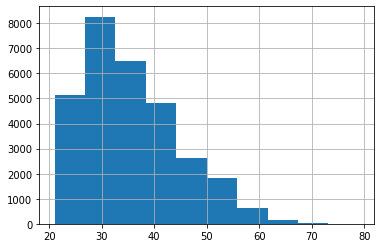

In [ ]:
#Use simple .hist function 
df.AGE.hist()

**Total amount of given credit**

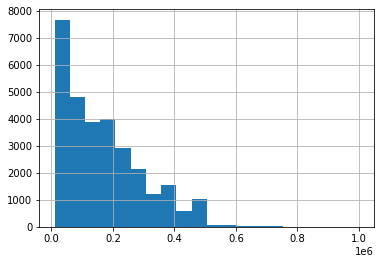

In [ ]:
#Use simple .hist function 
df.LIMIT_BAL.hist(bins = 20)

#Correlations with the target variable

**Probability of default based on debtor's sex**

In [ ]:
defaultProbBySex = df.groupby(['SEX', 'Default']).size().unstack(1)

In [ ]:
#Show dataset
defaultProbBySex

Default,0,1
SEX,,
1,9015,2873
2,14349,3763


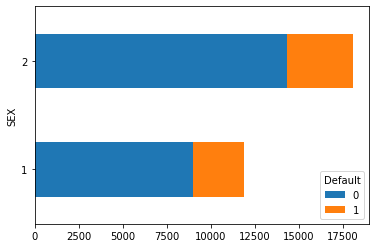

In [ ]:
#Provide a graphical representation
defaultProbBySex.plot(kind='barh', stacked = True)

#Reminder SEX: (1: male, 2: female), Default: (0: no, 1: yes)

In [ ]:
#Add another column to defaultProbBySex dataset
defaultProbBySex['prob (%)'] = (defaultProbBySex[1]/(defaultProbBySex[0] + defaultProbBySex[1]))*100 

In [ ]:
#Show updated dataset
defaultProbBySex

Default,0,1,prob (%)
SEX,,,
1,9015,2873,24.167227
2,14349,3763,20.776281


If we recall from above that the overall probablity of a debtor defaulting irrespective of their sex is 22.12%, that sits well with the two figures for males and females respectively.

We also see that even though there is a smaller representation of males in the data we can discern that the probability of a default is slightly higher if the debtor is male.

Other considerations e.g. do more highly educated males default more often than highly educated females will be considered.

**Probability of default based on debtor's educational level**

In [ ]:
defaultProbByEdLevel = df.groupby(['EDUCATION', 'Default']).size().unstack(1)

In [ ]:
#Show dataset
defaultProbByEdLevel

Default,0,1
EDUCATION,,
1,8549,2036
2,10700,3330
3,3680,1237
4,435,33


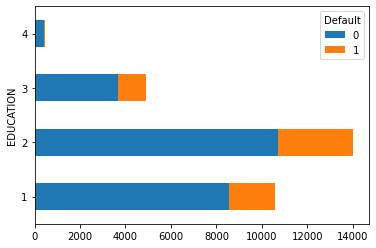

In [ ]:
#Provide a graphical representation
defaultProbByEdLevel.plot(kind='barh', stacked = True)

#Reminder EDUCATION: (1: graduate school, 2: university, 3: high school, 4: others), Default: (0: no, 1: yes)

In [ ]:
#Add another column to defaultProbByEdLevel dataset
defaultProbByEdLevel['prob (%)'] = (defaultProbByEdLevel[1]/(defaultProbByEdLevel[0] + defaultProbByEdLevel[1]))*100 

In [ ]:
#Show updated dataset
defaultProbByEdLevel

Default,0,1,prob (%)
EDUCATION,,,
1,8549,2036,19.234766
2,10700,3330,23.734854
3,3680,1237,25.157616
4,435,33,7.051282


Interestingly people who attended graduate school have a lower chance of defaulting than university graduates. However, people with only high school or other level of education are more likely to default than university graduates. A higher level of education does not always correlate to a lower chance of defaulting.

**Probability of default based on debtor's marital status**

In [ ]:
defaultProbByMaritalStatus = df.groupby(['MARRIAGE', 'Default']).size().unstack(1)

In [ ]:
#Show dataset
defaultProbByMaritalStatus

Default,0,1
MARRIAGE,,
1,10453,3206
2,12623,3341
3,288,89


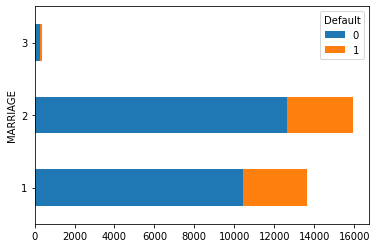

In [ ]:
#Provide a graphical representation
defaultProbByMaritalStatus.plot(kind='barh', stacked = True)

#Reminder EDUCATION: (1: married, 2: single, 3: others), Default: (0: no, 1: yes)

In [ ]:
#Add another column to defaultProbByMaritalStatus dataset
defaultProbByMaritalStatus['prob (%)'] = (defaultProbByMaritalStatus[1]/(defaultProbByMaritalStatus[0] + defaultProbByMaritalStatus[1]))*100 

In [ ]:
#Show updated dataset
defaultProbByMaritalStatus

Default,0,1,prob (%)
MARRIAGE,,,
1,10453,3206,23.471704
2,12623,3341,20.928339
3,288,89,23.607427


It may seem surprising but married people are more likely to default than people in the "others" category. It is a pity that a further breakdown is not available for the "others" category which comes in at the highest percentage of all for defaulting. This group is an accumulation of three groups about whom we only know that they are neither married or unmarried in the traditional sense.

#Are there any hidden correlations? - HEAT MAP

A heat map will now be created to look at the correlation of all variables.

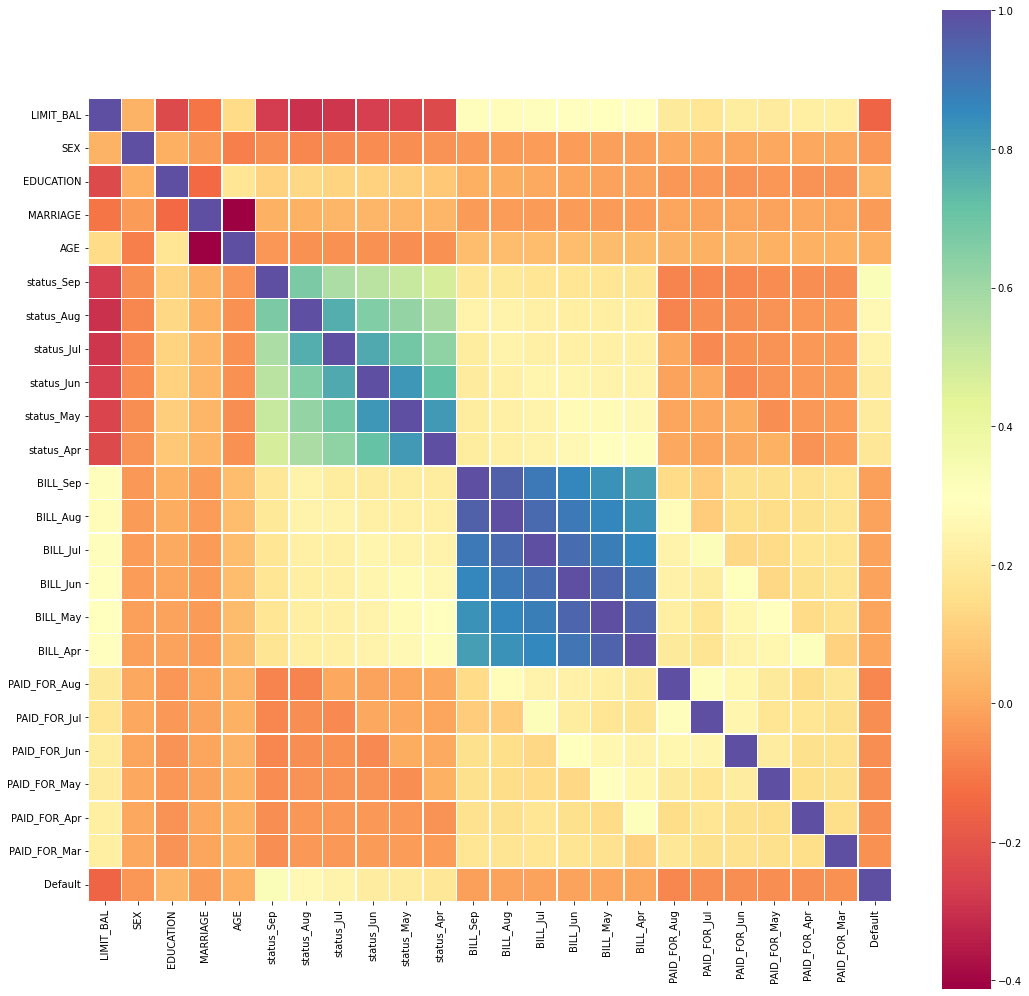

In [ ]:
#Correlation Matrix according to aPearson function
corr = df.corr() 
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="Spectral", linewidths=.5, ax=ax)

A correlation matrix of all variables is shown in the heatmap below. The only feature with a notable positive correlation with the dependent variable ‘Default’ is re-payment status during the last month (September). As the timeline tends towards the last month of data the correlation between status and default increases.

The highest negative correlation with default occurs with Limit_Balance, indicating that customers with lower limit balance are more likely to default.- does it???? 

It can also be observed that some variables are highly correlated to each other, that is the case of the amount of bill statement and the repayment status in different months.

#Machine learning model - will the debtor default?

**Decision Tree**

Need to properly investigate random state 

In [ ]:
#Define Default (target variable) as y
y = df['Default'].copy()

In [ ]:
#Take the entire dataset and input as features into the decision tree
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'status_Sep', 'status_Aug',
       'status_Jul', 'status_Jun', 'status_May', 'status_Apr', 'BILL_Sep', 'BILL_Aug',
       'BILL_Jul', 'BILL_Jun', 'BILL_May', 'BILL_Apr', 'PAID_FOR_Aug',
       'PAID_FOR_Jul', 'PAID_FOR_Jun', 'PAID_FOR_May', 'PAID_FOR_Apr', 'PAID_FOR_Mar']
X = df[features].copy()
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'status_Sep',
       'status_Aug', 'status_Jul', 'status_Jun', 'status_May', 'status_Apr',
       'BILL_Sep', 'BILL_Aug', 'BILL_Jul', 'BILL_Jun', 'BILL_May', 'BILL_Apr',
       'PAID_FOR_Aug', 'PAID_FOR_Jul', 'PAID_FOR_Jun', 'PAID_FOR_May',
       'PAID_FOR_Apr', 'PAID_FOR_Mar'],
      dtype='object')

In [ ]:
#Separate dataset into train and test and do not allow algorithm to "see" test data until after creation
#Decision tree algorithm will train on 80% of the data and test or make predictions on leftover 20%
#random_state=42 ensures same train and test sets across different executions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
#Create and train classifier
classifier = DecisionTreeClassifier(max_depth=10, random_state=14) 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=14)

In [ ]:
#Display predictions on the test
predictions = classifier.predict(X_test)

#Display how accurate the predictions were
accuracy_score(y_true = y_test, y_pred = predictions)*100

81.05

Just over 81% seems to be a good score for a first configuration. Can it be improved upon?

In [ ]:
#DO I NEED THIS????
#Run same code again but increase depth to 100
classifier = DecisionTreeClassifier(max_depth=100, random_state=14) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.7268333333333333

In [ ]:
#Create a grid for the parameter abd create grid
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')


In [ ]:
#This takes a long time to load, output will be:
#DecisionTreeClassifier(max_depth=4, max_leaf_nodes=20, min_samples_split=20)
#0.8213333333333332

#Allow the algorithm to determine the parameters giving the best predictions
#Display best parameters and score achieved
grid_tree.fit(X_train, y_train)
print(grid_tree.best_estimator_)
print(np.abs(grid_tree.best_score_))

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=20, min_samples_split=20)
0.8213333333333332


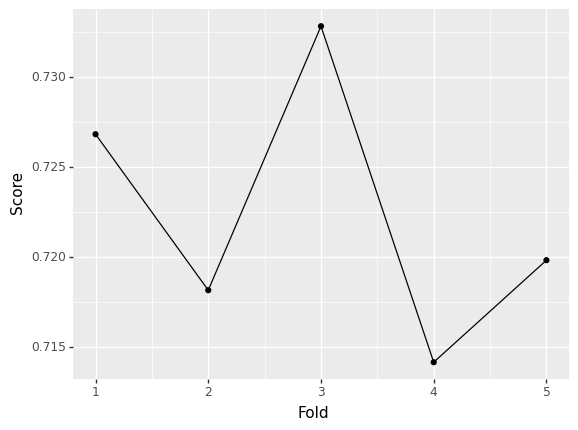

In [ ]:
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features]
    label = training['Default']
    valid_feats = valid[features]
    valid_label = valid['Default']
    classifier.fit(feats,label)
    pred = classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
performance = pd.DataFrame({'Score':scr,'Fold':fold})

g = ggplot(performance,aes(x='Fold',y='Score')) + geom_point() + geom_line()
print(g)

In [ ]:
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

get_feature_importance(classifier, features)

,feat,score
5,status_Sep,0.162315
4,AGE,0.079469
11,BILL_Sep,0.065096
22,PAID_FOR_Mar,0.058056
19,PAID_FOR_Jun,0.056913
0,LIMIT_BAL,0.054629
21,PAID_FOR_Apr,0.047962
16,BILL_Apr,0.046471
15,BILL_May,0.046458
12,BILL_Aug,0.045614


In [ ]:
X = df[['status_Sep']].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
classifier.fit(X_train, y_train) #same classifier as before
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.8193333333333334

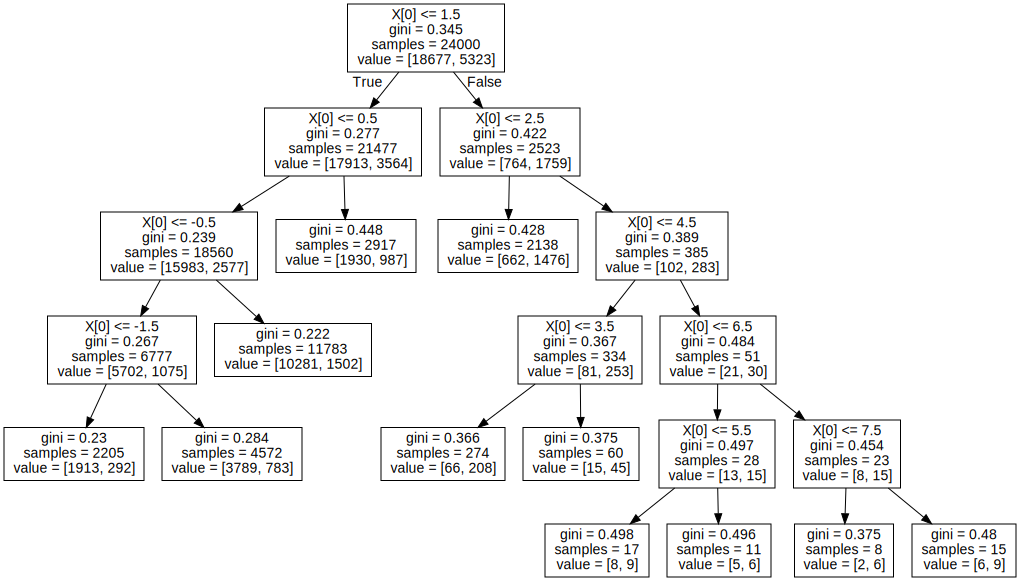

In [ ]:
dot_data = tree.export_graphviz(classifier, out_file=None)  
graph = graphviz.Source(dot_data)  
graph

In [ ]:
#recreate the model and evaluate it
X = df[features].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
classifier.fit(X_train, y_train) #same classifier as before
predictions = classifier.predict(X_test)
f1_score(y_true = y_test, y_pred = predictions)

0.39985353350421093

In [ ]:
# True Positive (TP): we predict a label of 1 (positive), and the true label is 1.
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
 
# True Negative (TN): we predict a label of 0 (negative), and the true label is 0.
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
 
# False Positive (FP): we predict a label of 1 (positive), but the true label is 0.
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
 
# False Negative (FN): we predict a label of 0 (negative), but the true label is 1.
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
 
print('TP: {}, FP: {}, TN: {}, FN: {}'.format(TP,FP,TN,FN))

TP: 546, FP: 872, TN: 3815, FN: 767


In [ ]:
#This takes a long time to load, output should be:
#DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20)
#0.4810953008927747
#-------------
#0.4735565259582727
#            feat     score
#5     status_Sep  0.700650
#6     status_Aug  0.139971
#19  PAID_FOR_Jun  0.053501
#9     status_May  0.023119
#11      BILL_Sep  0.018408
#7     status_Jul  0.016856
#0      LIMIT_BAL  0.014513
#2      EDUCATION  0.009691
#10    status_Apr  0.008588
#8     status_Jun  0.007821
#4            AGE  0.004114
#18  PAID_FOR_Jul  0.002769
#3       MARRIAGE  0.000000
#1            SEX  0.000000
#12      BILL_Aug  0.000000
#13      BILL_Jul  0.000000
#14      BILL_Jun  0.000000
#15      BILL_May  0.000000
#16      BILL_Apr  0.000000
#17  PAID_FOR_Aug  0.000000
#20  PAID_FOR_May  0.000000
#21  PAID_FOR_Apr  0.000000
#22  PAID_FOR_Mar  0.000000


param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'f1')
grid_tree.fit(X_train, y_train)
best = grid_tree.best_estimator_
print(grid_tree.best_estimator_)
print(np.abs(grid_tree.best_score_))
classifier = best
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print("-------------")
print(f1_score(y_true = y_test, y_pred = predictions))
print(get_feature_importance(classifier, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
print('TP: {}, FP: {}, TN: {}, FN: {}'.format(TP,FP,TN,FN))

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20)
0.4810953008927747
-------------
0.4735565259582727
            feat     score
5     status_Sep  0.700650
6     status_Aug  0.139971
19  PAID_FOR_Jun  0.053501
9     status_May  0.023119
11      BILL_Sep  0.018408
7     status_Jul  0.016856
0      LIMIT_BAL  0.014513
2      EDUCATION  0.009691
10    status_Apr  0.008588
8     status_Jun  0.007821
4            AGE  0.004114
18  PAID_FOR_Jul  0.002769
3       MARRIAGE  0.000000
1            SEX  0.000000
12      BILL_Aug  0.000000
13      BILL_Jul  0.000000
14      BILL_Jun  0.000000
15      BILL_May  0.000000
16      BILL_Apr  0.000000
17  PAID_FOR_Aug  0.000000
20  PAID_FOR_May  0.000000
21  PAID_FOR_Apr  0.000000
22  PAID_FOR_Mar  0.000000
-------------
TP: 488, FP: 260, TN: 4427, FN: 825


In [ ]:
#This takes a long time to load, output should be:
#DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
#                       max_depth=4, max_leaf_nodes=20)
#0.5272459994648475
#-------------
#0.5203784570596798
#-------------
#TP: 715, FP: 720, TN: 3967, FN: 598


param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20],
             'class_weight' : ['balanced']}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'f1')
grid_tree.fit(X_train, y_train)
best = grid_tree.best_estimator_
print(grid_tree.best_estimator_)
print(np.abs(grid_tree.best_score_))
classifier = best
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print("-------------")
print(f1_score(y_true = y_test, y_pred = predictions))
#print(get_feature_importance(classifier, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
print('TP: {}, FP: {}, TN: {}, FN: {}'.format(TP,FP,TN,FN))

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, max_leaf_nodes=20)
0.5272459994648475
-------------
0.5203784570596798
-------------
TP: 715, FP: 720, TN: 3967, FN: 598
